<a href="https://colab.research.google.com/github/SamanZargarzadeh/Deep-Learning/blob/main/14_Tensorflow_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will look at incorporating batch normalization into our models and look at an example of how we do this in practice.

# 1) Import

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# 2) Load Data 

We will be working with the diabetes dataset. 

Let's load and pre-process the dataset.

In [3]:
# Load the dataset

from sklearn.datasets import load_diabetes

In [4]:
# call the load diabetes function which returns a dictionary containing all of the information about the data set.

diabetes_dataset = load_diabetes()

In [5]:
# print the keys

print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [7]:
# take a look at the dataset description

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# Save the input and target variables

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [9]:
print("train X shape: ", data.shape) 
print("train y shape: ", targets.shape) 

train X shape:  (442, 10)
train y shape:  (442,)


In [10]:
print("minimum train y value: ", min(targets))
print("maximum train y value: ", max(targets))

minimum train y value:  25.0
maximum train y value:  346.0


In [11]:
# Normalize the target data (this will make clearer training curves, for example loss curve to be around 0 and 1)

targets = (targets - targets.mean()) / (targets.std())

In [12]:
print("minimum train y value: ", min(targets))
print("maximum train y value: ", max(targets))

minimum train y value:  -1.6509610124214391
maximum train y value:  2.5175590944313466


In [13]:
# Split the dataset into training and test datasets 

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

# 3) Model without Batch Normalization

In [14]:
# Build the model

model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(1)
])

In [15]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [17]:
# Train the model

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.0238 - mae: 0.8625 - val_loss: 0.9231 - val_mae: 0.8093 - 1s/epoch - 231ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9768 - mae: 0.8429 - val_loss: 0.8856 - val_mae: 0.7984 - 70ms/epoch - 12ms/step
Epoch 3/100
6/6 - 0s - loss: 0.9220 - mae: 0.8179 - val_loss: 0.8415 - val_mae: 0.7843 - 68ms/epoch - 11ms/step
Epoch 4/100
6/6 - 0s - loss: 0.8539 - mae: 0.7874 - val_loss: 0.7920 - val_mae: 0.7663 - 70ms/epoch - 12ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7850 - mae: 0.7500 - val_loss: 0.7429 - val_mae: 0.7493 - 51ms/epoch - 9ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6995 - mae: 0.7043 - val_loss: 0.7039 - val_mae: 0.7303 - 58ms/epoch - 10ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6160 - mae: 0.6550 - val_loss: 0.6735 - val_mae: 0.7065 - 59ms/epoch - 10ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5733 - mae: 0.6257 - val_loss: 0.6679 - val_mae: 0.6950 - 74ms/epoch - 12ms/step
Epoch 9/100
6/6 - 0s - loss: 0.5681 - mae: 0.6161 - val_loss: 0.6591 - val_mae: 0.6795 - 51ms/epoch - 8ms/

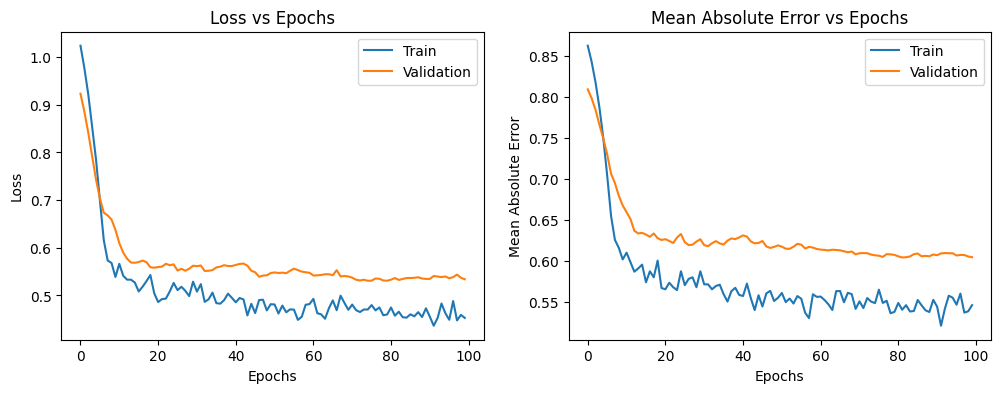

In [20]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

# 4)Model with Batch Normalization

We can implement batch normalization into our model by adding it in the same way as any other layer.

In [21]:
# Build the model
#model = Sequential([
#    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
#    Dropout(0.5),
#    Dense(256, activation='relu'),
#    Dense(1)
#])

model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    BatchNormalization(), # <- Batch normalization layer 2
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dense(1)
])

In [22]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [23]:
# the number of parameters in batch normalization layers equal the number of nodes x 4
# 4 = moving_mean, moving_var, gamma and beta
# trainable = gamma, beta
# non-trainable = moving_mean, moving_var
# moving_mean = moving_mean * momentum + mean(batch) * (1 - momentum)
# moving_var = moving_var * momentum + var(batch) * (1 - momentum)

In [24]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [25]:
# Train the model

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
6/6 - 3s - loss: 3.7867 - mae: 1.5070 - val_loss: 0.9346 - val_mae: 0.8137 - 3s/epoch - 478ms/step
Epoch 2/100
6/6 - 0s - loss: 1.9683 - mae: 1.1046 - val_loss: 0.9324 - val_mae: 0.8125 - 106ms/epoch - 18ms/step
Epoch 3/100
6/6 - 0s - loss: 1.6096 - mae: 1.0012 - val_loss: 0.9262 - val_mae: 0.8114 - 90ms/epoch - 15ms/step
Epoch 4/100
6/6 - 0s - loss: 1.3021 - mae: 0.9147 - val_loss: 0.9268 - val_mae: 0.8118 - 94ms/epoch - 16ms/step
Epoch 5/100
6/6 - 0s - loss: 1.1354 - mae: 0.8447 - val_loss: 0.9364 - val_mae: 0.8138 - 96ms/epoch - 16ms/step
Epoch 6/100
6/6 - 0s - loss: 1.2935 - mae: 0.9192 - val_loss: 0.9289 - val_mae: 0.8122 - 81ms/epoch - 14ms/step
Epoch 7/100
6/6 - 0s - loss: 0.9814 - mae: 0.7920 - val_loss: 0.9212 - val_mae: 0.8104 - 72ms/epoch - 12ms/step
Epoch 8/100
6/6 - 0s - loss: 1.0502 - mae: 0.8274 - val_loss: 0.9237 - val_mae: 0.8109 - 54ms/epoch - 9ms/step
Epoch 9/100
6/6 - 0s - loss: 0.9471 - mae: 0.7734 - val_loss: 0.9200 - val_mae: 0.8100 - 60ms/epoch - 10m

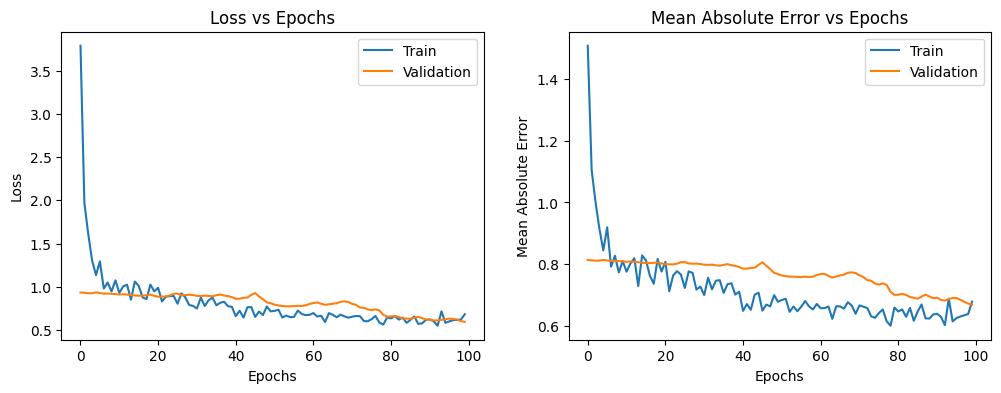

In [26]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

### Customising parameters

Recall that there are some parameters and hyperparameters associated with batch normalization.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalization over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalization. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

We can also specify the axis for batch normalization. By default, it is set as -1.

Let's see an example.

In [27]:
# the previous model
# model = Sequential([
#     Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
#     BatchNormalization(),  # <- Batch normalization layer 1
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(), # <- Batch normalization layer 2
#     Dense(1)
# ])

model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    BatchNormalization(), # <- Batch normalization layer 2
    Dropout(0.5),
    Dense(256, activation='relu'),
    #BatchNormalization(),
    #Dense(1)
])

# Notice that in this new model,we still have not added the output layer because we still have more layers to add!

In [29]:
# Add a customised batch normalization layer 2

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, # default is 0.99
    epsilon=0.005, #default is 0.001
    axis = -1, #default is -1 (meaning the channel dimension is the last dimension)
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), # default is beta_initializer='zeros'
    gamma_initializer=tf.keras.initializers.Constant(value=0.9) # default is gamma_initializer='ones'
))

In [30]:
# Add the output layer

model.add(Dense(1))

In [31]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 256)              

Let's now compile and fit our model with batch normalization, and track the progress on training and validation sets.

First we compile our model.

In [32]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

Now we fit the model to the data.

In [33]:
# Train the model

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
6/6 - 3s - loss: 2.3766 - mae: 1.2286 - val_loss: 0.9058 - val_mae: 0.8084 - 3s/epoch - 561ms/step
Epoch 2/100
6/6 - 0s - loss: 1.5163 - mae: 0.9858 - val_loss: 0.9044 - val_mae: 0.8090 - 112ms/epoch - 19ms/step
Epoch 3/100
6/6 - 0s - loss: 1.1956 - mae: 0.8599 - val_loss: 0.9040 - val_mae: 0.8091 - 90ms/epoch - 15ms/step
Epoch 4/100
6/6 - 0s - loss: 1.0814 - mae: 0.8403 - val_loss: 0.9131 - val_mae: 0.8133 - 78ms/epoch - 13ms/step
Epoch 5/100
6/6 - 0s - loss: 1.1694 - mae: 0.8934 - val_loss: 0.9065 - val_mae: 0.8110 - 73ms/epoch - 12ms/step
Epoch 6/100
6/6 - 0s - loss: 1.0768 - mae: 0.8149 - val_loss: 0.8990 - val_mae: 0.8083 - 83ms/epoch - 14ms/step
Epoch 7/100
6/6 - 0s - loss: 1.0182 - mae: 0.8153 - val_loss: 0.8924 - val_mae: 0.8054 - 99ms/epoch - 17ms/step
Epoch 8/100
6/6 - 0s - loss: 1.0555 - mae: 0.8262 - val_loss: 0.8883 - val_mae: 0.8032 - 65ms/epoch - 11ms/step
Epoch 9/100
6/6 - 0s - loss: 0.7960 - mae: 0.7394 - val_loss: 0.8854 - val_mae: 0.8018 - 76ms/epoch - 13

Finally, we plot training and validation loss and accuracy to observe how the accuracy of our model improves over time.

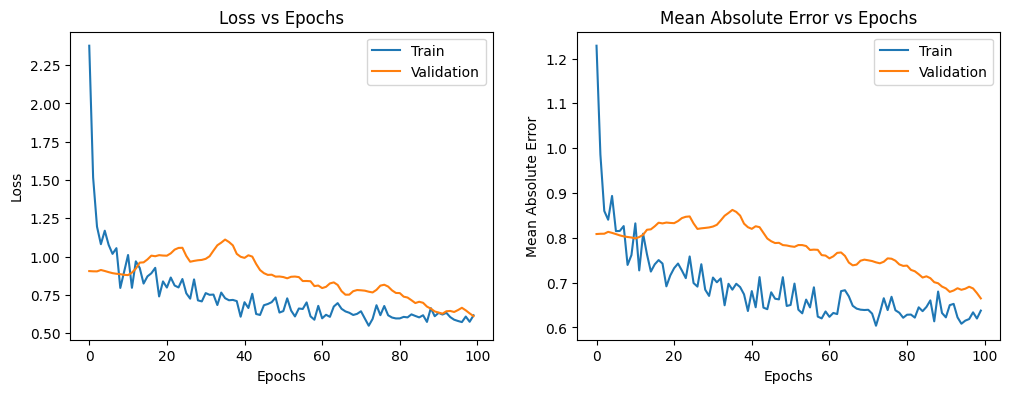

In [34]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

## Further reading and resources 
* https://keras.io/layers/normalization/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization